#Technical Analysis


##Library and dataset

In [374]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import plotly.graph_objects as go
import seaborn as sns
from pandas.plotting import scatter_matrix


In [375]:
tata_motors_data =pd.read_csv("TATAMOTORS.NS.csv")
tata_motors_data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-01,184.949997,187.000000,184.500000,186.500000,185.920547,27334421
1,2021-01-04,191.800003,193.000000,188.750000,191.300003,190.705627,63980597
2,2021-01-05,187.100006,193.899994,185.050003,193.199997,192.599716,75752593
3,2021-01-06,194.449997,197.600006,190.649994,195.399994,194.792877,75621947
4,2021-01-07,197.000000,200.350006,195.100006,196.750000,196.138702,66024848
5,2021-01-08,198.750000,201.500000,197.100006,198.149994,197.534332,53991568
6,2021-01-11,199.899994,225.399994,199.649994,220.649994,219.964432,182483100
7,2021-01-12,227.000000,252.399994,224.100006,237.800003,237.061157,390577839
8,2021-01-13,242.899994,248.800003,238.399994,242.600006,241.846252,164649387
9,2021-01-14,242.850006,249.800003,238.600006,245.100006,244.338470,86819519


##Moving Average

In [376]:
# Moving Average
def MA(data,days):
  data['MA_50'] = data['Close'].rolling(window=days).mean()
  sum=0

  for i in range(days):
    sum+=data['Close'][i]
    data['MA_50'][i]=sum/(i+1)
  sma=data['MA_50']
  return data,sma

data,_=MA(tata_motors_data,50)
data[['Date','Close','MA_50']].head(10)



,Date,Close,MA_50
0,2021-01-01,186.500000,186.500000
1,2021-01-04,191.300003,188.900002
2,2021-01-05,193.199997,190.333333
3,2021-01-06,195.399994,191.599998
4,2021-01-07,196.750000,192.629999
5,2021-01-08,198.149994,193.549998
6,2021-01-11,220.649994,197.421426
7,2021-01-12,237.800003,202.468748
8,2021-01-13,242.600006,206.927777
9,2021-01-14,245.100006,210.745000


In [377]:
# #Simple Moving Average
# plt.plot(data['Open'], label="Stock Values", color="black")
# plt.plot(data['MA_50'], label="50 days SMA Values", color="red")
# plt.xlabel("Days")
# plt.ylabel("Price")
# plt.legend()
# plt.show()

In [378]:
# #Exponential Moving Average
ema = data['Close'].ewm(com=0.9).mean()
# plt.plot(data['Close'], label="Stock Values", color="black")
# plt.plot(ema, label="EMA Values", color="red")
# plt.xlabel("Days")
# plt.ylabel("Price")
# plt.legend()
# plt.show()

In [379]:
fig = go.Figure(data=[go.Candlestick(x=tata_motors_data['Date'],
                                     open=tata_motors_data['Open'],
                                     high=tata_motors_data['High'],
                                     low=tata_motors_data['Low'],
                                     close=tata_motors_data['Close'],
                                     name='Candlestick'),
                      go.Scatter(x=tata_motors_data['Date'],
                                 y=tata_motors_data['MA_50'],
                                 mode='lines',
                                 name='50-day Moving Average')])

fig.update_layout(title='Candlestick Chart with 50-day Moving Average',
                  xaxis_title='Date',
                  yaxis_title='Price')
fig.show()


In [380]:
fig = go.Figure(data=[go.Candlestick(x=tata_motors_data['Date'],
                                     open=tata_motors_data['Open'],
                                     high=tata_motors_data['High'],
                                     low=tata_motors_data['Low'],
                                     close=tata_motors_data['Close'],
                                     name='Candlestick'),
                      go.Scatter(x=tata_motors_data['Date'],
                                 y=ema,
                                 mode='lines',
                                 name='EMA')])

fig.update_layout(title='Candlestick Chart of Exponential Moving Average',
                  xaxis_title='Date',
                  yaxis_title='Price')
fig.show()


In [381]:
# Function to calculate RSI
def calculate_rsi(data, column_name='Close', period=14):

    delta = data[column_name].diff(1)

    gains = delta.where(delta > 0, 0)
    losses = -delta.where(delta < 0, 0)
    avg_gain = gains.rolling(window=period, min_periods=1).mean()
    avg_loss = losses.rolling(window=period, min_periods=1).mean()


    rs = avg_gain / avg_loss

    # Calculate RSI
    rsi = 100 - (100 / (1 + rs))
    data['RSI'] = rsi
    data['RSI'][0]=100

    return data

# Apply the RSI calculation
tata_motors_data = calculate_rsi(tata_motors_data)


tata_motors_data[['Date', 'Close', 'RSI']].head(20)


,Date,Close,RSI
0,2021-01-01,186.500000,100.000000
1,2021-01-04,191.300003,100.000000
2,2021-01-05,193.199997,100.000000
3,2021-01-06,195.399994,100.000000
4,2021-01-07,196.750000,100.000000
5,2021-01-08,198.149994,100.000000
6,2021-01-11,220.649994,100.000000
7,2021-01-12,237.800003,100.000000
8,2021-01-13,242.600006,100.000000
9,2021-01-14,245.100006,100.000000


In [382]:

tata_motors_data['Signal'] = 'Hold'
tata_motors_data.loc[tata_motors_data['RSI'] > 70, 'Signal'] = 'Sell'
tata_motors_data.loc[tata_motors_data['RSI'] < 30, 'Signal'] = 'Buy'



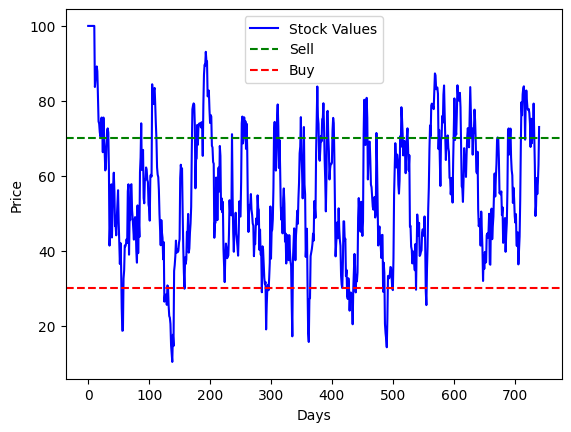

In [383]:

plt.plot(tata_motors_data['RSI'], label="Stock Values", color="blue")
plt.axhline(y=70, color='green', linestyle='--', label='Sell')
plt.axhline(y=30, color='red', linestyle='--', label='Buy')
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()

##Bollinger Bands

In [384]:
#Bollinger Bands
def bollinger(data, days):
  ans=data['Close'].rolling(days).std()
  sum=0
  for i in range(days):
    sum+=(data['Close'][i]-data['MA_50'][i])*(data['Close'][i]-data['MA_50'][i])
    ans[i]=(np.sqrt(sum))/(i+1)
  _,middle=MA(data,days)
  lower=middle-2*ans
  upper=middle+2*ans
  data['lower_band']=lower
  data['upper_band']=upper
  data['middle_band']=middle

  return data,lower,middle,upper

In [385]:
data,lower_band,middle_band,upper_band=bollinger(data,20)


In [386]:
fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'],
                name='Candlesticks'),
                go.Scatter(x=data['Date'], y=middle_band, mode='lines', line=dict(color='blue'), name='Middle Band'),
                go.Scatter(x=data['Date'], y=lower_band, mode='lines', line=dict(color='red'), name='Lower Band'),
                go.Scatter(x=data['Date'], y=upper_band, mode='lines', line=dict(color='green'), name='Upper Band')])


fig.update_layout(title=' Chart with Bollinger Bands',
                   xaxis_title='Date',
                   yaxis_title='Price',
                   )


fig.show()

Condition of over bought and over sold

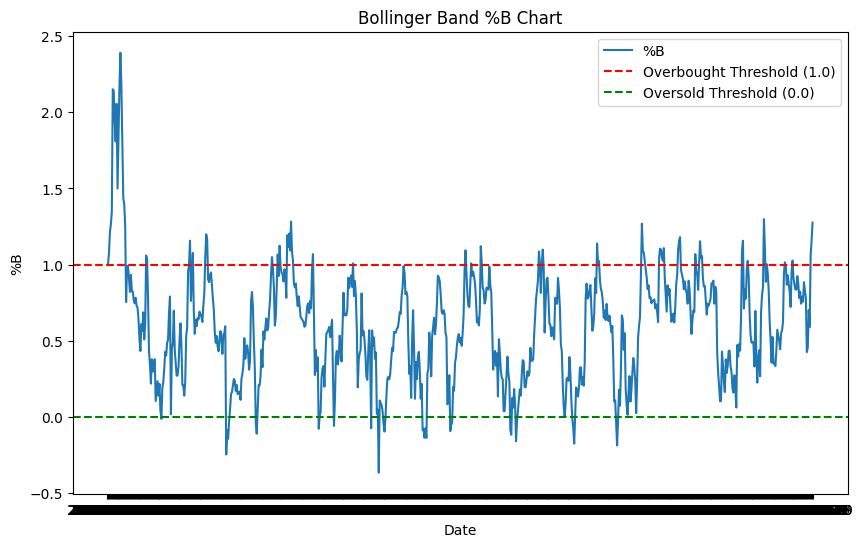

In [387]:
# Calculate %B
percent_b = (data['Close'] - lower_band) / (upper_band - lower_band)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], percent_b, label='%B')
plt.axhline(1, color='red', linestyle='--', label='Overbought Threshold (1.0)')
plt.axhline(0, color='green', linestyle='--', label='Oversold Threshold (0.0)')
plt.title('Bollinger Band %B Chart')
plt.xlabel('Date')
plt.ylabel('%B')
plt.legend()
plt.show()


##Moving Average Convergence Divergence

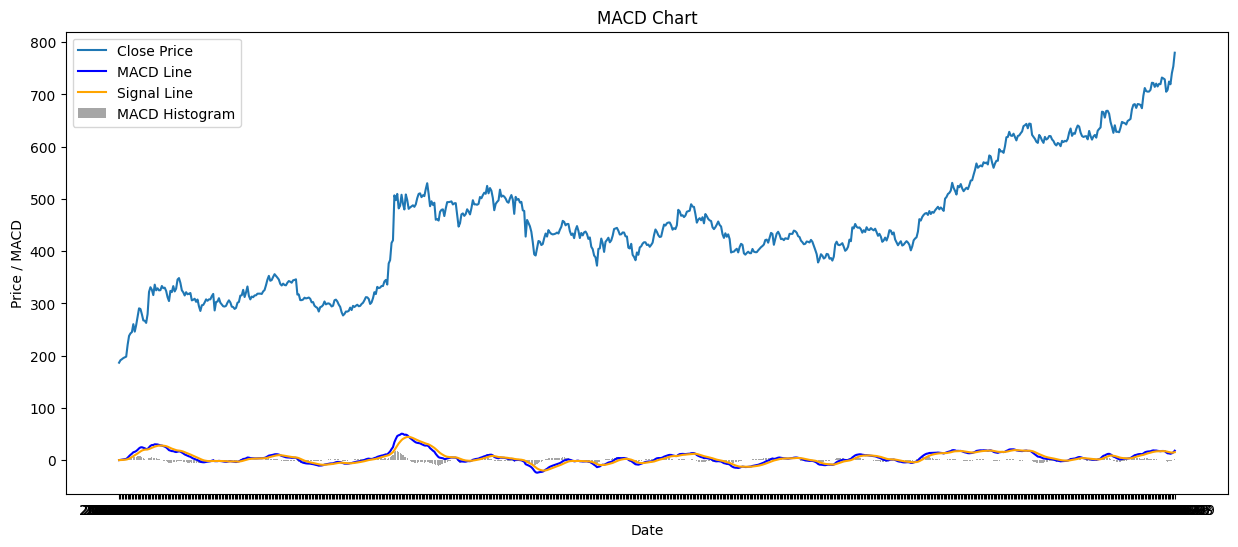

In [388]:
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):

    short_ema = data['Close'].ewm(span=short_window, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_window, adjust=False).mean()

    data['MACD'] = short_ema - long_ema

    data['Signal_Line'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()

    data['MACD_Histogram'] = data['MACD'] - data['Signal_Line']
    data['Buy_Signal'] = np.where(data['MACD'] > data['Signal_Line'], 1, 0)
    data['Sell_Signal'] = np.where(data['MACD'] < data['Signal_Line'], 1, 0)
    return data



data = calculate_macd(data)

plt.figure(figsize=(15, 6))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.plot(data['Date'], data['MACD'], label='MACD Line', color='blue')
plt.plot(data['Date'], data['Signal_Line'], label='Signal Line', color='orange')
plt.bar(data['Date'], data['MACD_Histogram'], label='MACD Histogram', color='gray', alpha=0.7)

plt.title('MACD Chart')
plt.xlabel('Date')
plt.ylabel('Price / MACD')
plt.legend()
plt.show()


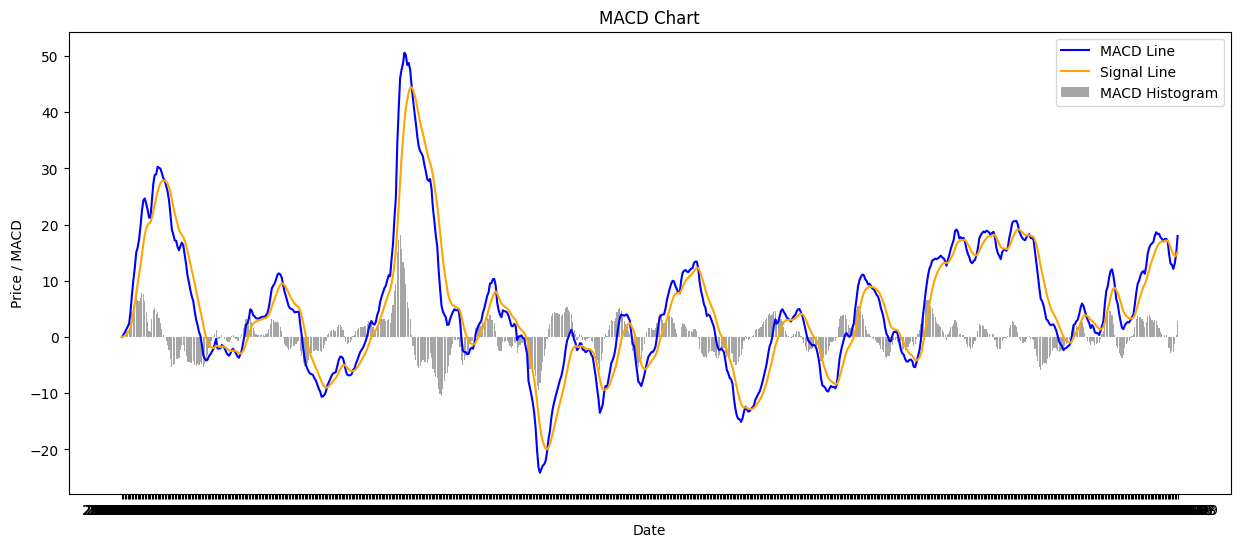

In [389]:

plt.figure(figsize=(15, 6))
plt.plot(data['Date'], data['MACD'], label='MACD Line', color='blue')
plt.plot(data['Date'], data['Signal_Line'], label='Signal Line', color='orange')
plt.bar(data['Date'], data['MACD_Histogram'], label='MACD Histogram', color='gray', alpha=0.7)

plt.title('MACD Chart')
plt.xlabel('Date')
plt.ylabel('Price / MACD')
plt.legend()
plt.show()

##Correlation Analysis

I had chosen the indicator Moving Average, RSI,MACD,Bollinger Band

<Axes: >

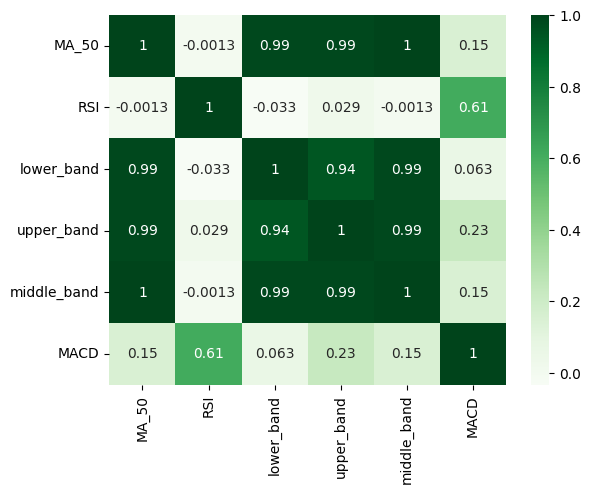

In [390]:
correlation=data[['MA_50','RSI','lower_band','upper_band','middle_band','MACD']]
matrix = correlation.corr()
sns.heatmap(matrix, cmap="Greens", annot=True)

<Figure size 12500x12500 with 0 Axes>

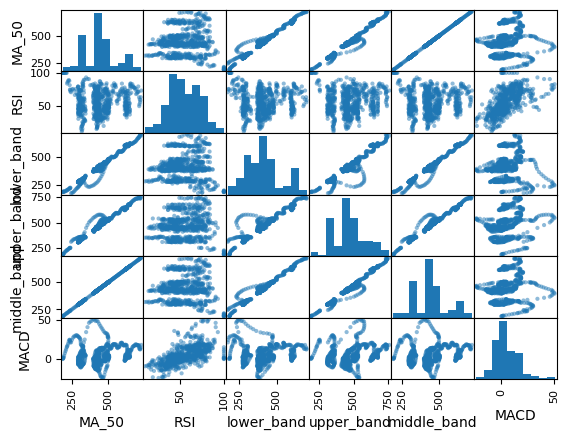

In [391]:

plt.figure(figsize=(125,125))
scatter_matrix(data[['MA_50','RSI','lower_band','upper_band','middle_band','MACD']])
plt.show()

##Combined Indicator

In [392]:
weights = matrix['MA_50'].abs()
weights /= weights.sum()
weights


MA_50          0.242614
RSI            0.000309
lower_band     0.239023
upper_band     0.239233
middle_band    0.242614
MACD           0.036208
Name: MA_50, dtype: float64

In [393]:
data['combined_indicator']=(data['MA_50']*weights['MA_50']+data['MACD']*weights['MACD']+data['RSI']*weights['RSI']
                            +data['lower_band'] * weights['lower_band']
                            +data['upper_band'] * weights['upper_band']
                            +data['middle_band'] * weights['middle_band']
                            )
data[['combined_indicator','Close']].head(20)

,combined_indicator,Close
0,179.720454,186.500000
1,182.047183,191.300003
2,183.444386,193.199997
3,184.683531,195.399994
4,185.693918,196.750000
5,186.597707,198.149994
6,190.406316,220.649994
7,195.378637,237.800003
8,199.770997,242.600006
9,203.527088,245.100006


##bullish and Bearish Positions

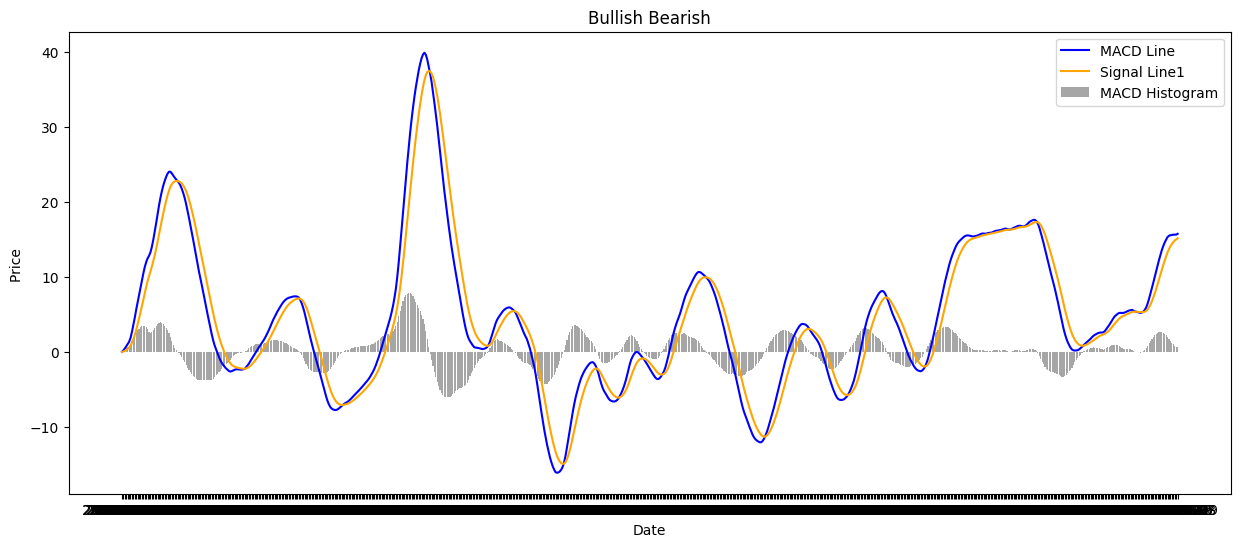

In [394]:
def bullish_Bearish(data, short_window=12, long_window=26, signal_window=9):

    short_ema = data['combined_indicator'].ewm(span=short_window, adjust=False).mean()
    long_ema = data['combined_indicator'].ewm(span=long_window, adjust=False).mean()

    data['MACD1'] = short_ema - long_ema

    data['Signal_Line1'] = data['MACD1'].ewm(span=signal_window, adjust=False).mean()

    data['MACD_Histogram1'] = data['MACD1'] - data['Signal_Line1']

    return data



data = bullish_Bearish(data)

data['Buy_Signal1'] = np.where(data['MACD1'] > data['Signal_Line1'], 1, 0)
data['Sell_Signal1'] = np.where(data['MACD1'] < data['Signal_Line1'], 1, 0)

plt.figure(figsize=(15, 6))
plt.plot(data['Date'], data['MACD1'], label='MACD Line', color='blue')
plt.plot(data['Date'], data['Signal_Line1'], label='Signal Line1', color='orange')
plt.bar(data['Date'], data['MACD_Histogram1'], label='MACD Histogram', color='gray', alpha=0.7)

plt.title('Bullish Bearish')
plt.xlabel('Date')
plt.ylabel('Price ')
plt.legend()
plt.show()



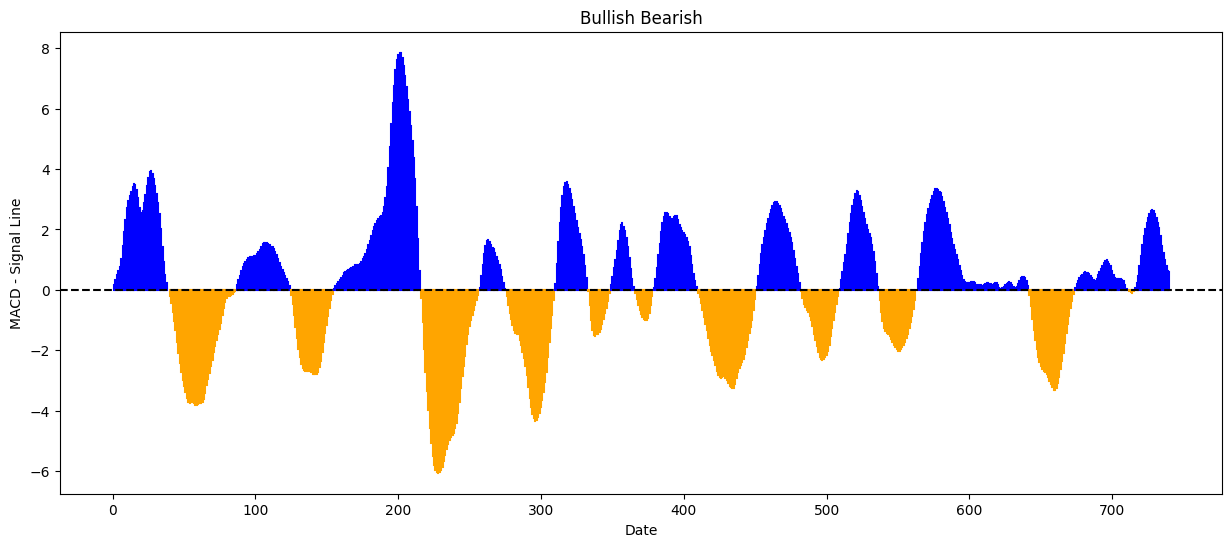

In [395]:
macd_difference = data['MACD1'] - data['Signal_Line1']

plt.figure(figsize=(15, 6))
for i in range(len(macd_difference)):
    color = 'blue' if macd_difference[i] > 0 else 'orange'
    plt.plot([i, i], [0, macd_difference[i]], color=color)

plt.axhline(0, linestyle='--', color='black')


plt.title('Bullish Bearish')
plt.xlabel('Date')
plt.ylabel('MACD - Signal Line')
plt.show()


##Accuracy

In [396]:
# Accuracy
acc = len(data[((data['Buy_Signal1'] == 1) & (data['Buy_Signal'] == 1)) | ((data['Sell_Signal'] == 1) & (data['Sell_Signal1'] == 1))]) / len(data)
accuracy=acc*100
print("Accuracy of the combined model is",accuracy)


Accuracy of the combined model is 65.04723346828611
